# 🏥 Patient Survival Prediction System
Predict whether a patient survives based on clinical features using machine learning.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"/content/dataset_med.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,0.0,0.0,1.0,0.0,Chemotherapy,2017-09-10,0.0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,1.0,1.0,0.0,0.0,Surgery,2024-06-17,1.0
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,1.0,1.0,0.0,0.0,Combined,2024-04-09,0.0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,1.0,1.0,0.0,0.0,Chemotherapy,2017-04-23,0.0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,0.0,0.0,0.0,0.0,Combined,2025-01-08,0.0


In [ ]:
# Overview
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150779 entries, 0 to 150778
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150779 non-null  int64  
 1   age                 150779 non-null  float64
 2   gender              150779 non-null  object 
 3   country             150779 non-null  object 
 4   diagnosis_date      150779 non-null  object 
 5   cancer_stage        150779 non-null  object 
 6   family_history      150779 non-null  object 
 7   smoking_status      150779 non-null  object 
 8   bmi                 150778 non-null  float64
 9   cholesterol_level   150778 non-null  float64
 10  hypertension        150778 non-null  float64
 11  asthma              150778 non-null  float64
 12  cirrhosis           150778 non-null  float64
 13  other_cancer        150778 non-null  float64
 14  treatment_type      150778 non-null  object 
 15  end_treatment_date  150778 non-nul

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,1
cholesterol_level,1


In [ ]:
# Unique values in categorical features
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female']
country: ['Sweden' 'Netherlands' 'Hungary' 'Belgium' 'Luxembourg' 'Italy' 'Croatia'
 'Denmark' 'Malta' 'Germany' 'Poland' 'Ireland' 'Romania' 'Spain' 'Greece'
 'Estonia' 'Cyprus' 'France' 'Slovenia' 'Latvia' 'Portugal' 'Austria'
 'Czech Republic' 'Finland' 'Lithuania' 'Slovakia' 'Bulgaria']
diagnosis_date: ['2016-04-05' '2023-04-20' '2023-04-05' ... '2017-12-27' '2021-04-22'
 '2020-04-02']
cancer_stage: ['Stage I' 'Stage III' 'Stage IV' 'Stage II']
family_history: ['Yes' 'No']
smoking_status: ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker'
 'Passive Smo']
treatment_type: ['Chemotherapy' 'Surgery' 'Combined' 'Radiation' nan]
end_treatment_date: ['2017-09-10' '2024-06-17' '2024-04-09' ... '2026-04-21' '2015-01-24' nan]


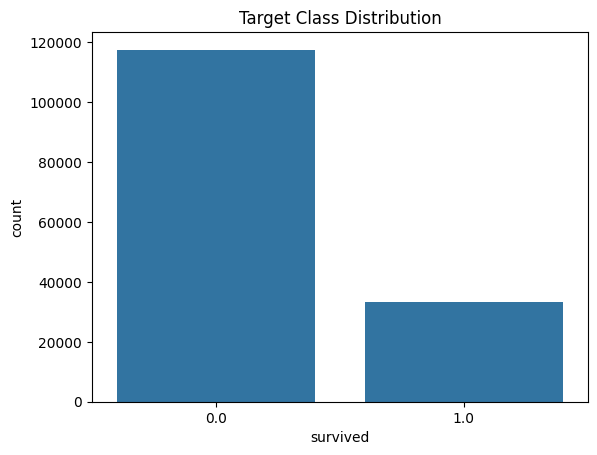

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x='survived', data=df)
plt.title('Target Class Distribution')
plt.show()

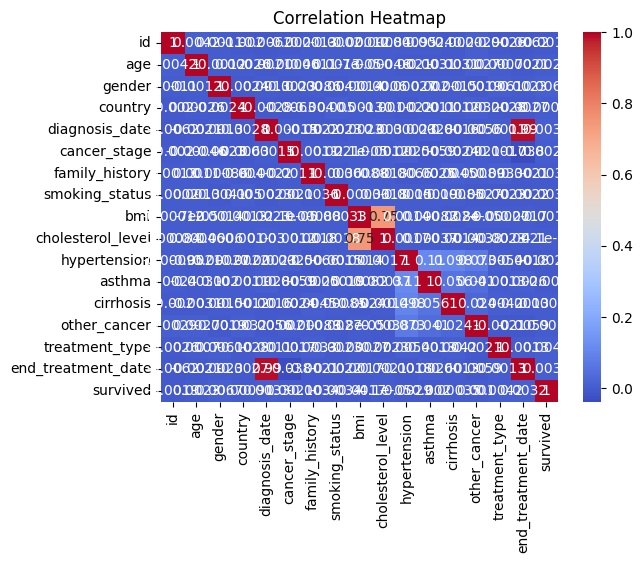

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encoding
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Split features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Model comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"---- {name} ----")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

---- Logistic Regression ----
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     23509
         1.0       0.00      0.00      0.00      6647

    accuracy                           0.78     30156
   macro avg       0.39      0.50      0.44     30156
weighted avg       0.61      0.78      0.68     30156

ROC-AUC Score: 0.5014098835599217


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---- Random Forest ----
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     23509
         1.0       0.25      0.00      0.00      6647

    accuracy                           0.78     30156
   macro avg       0.51      0.50      0.44     30156
weighted avg       0.66      0.78      0.68     30156

ROC-AUC Score: 0.4982549279658672


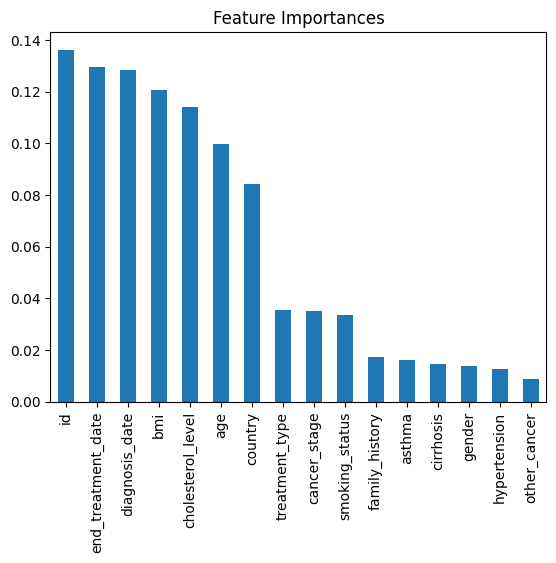

In [ ]:
# Feature importance (Random Forest)
importances = models["Random Forest"].feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
import joblib

# Save model
final_model = grid.best_estimator_
joblib.dump(final_model, 'patient_survival_model.pkl')

['patient_survival_model.pkl']